In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from math import radians, sin, cos, sqrt, atan2

%matplotlib inline

In [2]:
df = pd.read_csv('../data/gps.csv')
df.head()

,Id,Longitude,Latitude,Accuracy,TimeStamp,Date,DateTime,IsGPSOn,BatLevel,Provider,Bearing,DeviceTime,RepId
0,883873960,80.55590,7.16898,2.3,1695694012000,26/09/2023 12:00:00 AM,26/09/2023 2:06:52 AM,True,0,gps,124.15,26/09/2023 7:36:54 AM,395
1,883873961,80.55589,7.16899,2.1,1695694025000,26/09/2023 12:00:00 AM,26/09/2023 2:07:05 AM,True,0,gps,152.95,26/09/2023 7:37:05 AM,395
2,883874460,80.55589,7.16899,3.6,1695694027676,26/09/2023 12:00:00 AM,26/09/2023 2:07:08 AM,True,0,gps,201.10,26/09/2023 7:37:08 AM,395
3,883874461,80.55589,7.16899,3.5,1695694028176,26/09/2023 12:00:00 AM,26/09/2023 2:07:08 AM,True,0,gps,201.39,26/09/2023 7:37:08 AM,395
4,883874462,80.55586,7.16899,3.1,1695694029000,26/09/2023 12:00:00 AM,26/09/2023 2:07:09 AM,True,0,gps,187.51,26/09/2023 7:37:09 AM,395


In [3]:
df.shape

(166593, 13)

In [4]:
df.columns

Index(['Id', 'Longitude', 'Latitude', 'Accuracy', 'TimeStamp', 'Date',
       'DateTime', 'IsGPSOn', 'BatLevel', 'Provider', 'Bearing', 'DeviceTime',
       'RepId'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166593 entries, 0 to 166592
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          166593 non-null  int64  
 1   Longitude   166593 non-null  float64
 2   Latitude    166593 non-null  float64
 3   Accuracy    166593 non-null  float64
 4   TimeStamp   166593 non-null  int64  
 5   Date        166593 non-null  object 
 6   DateTime    166593 non-null  object 
 7   IsGPSOn     166593 non-null  bool   
 8   BatLevel    166593 non-null  int64  
 9   Provider    166593 non-null  object 
 10  Bearing     166593 non-null  float64
 11  DeviceTime  166593 non-null  object 
 12  RepId       166593 non-null  int64  
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 15.4+ MB


In [6]:
df.describe()

,Id,Longitude,Latitude,Accuracy,TimeStamp,BatLevel,Bearing,RepId
count,1.665930e+05,166593.000000,166593.000000,166593.000000,1.665930e+05,166593.000000,166593.000000,166593.0
mean,8.852408e+08,80.581402,7.189027,3.297644,1.695712e+12,69.535365,161.092791,395.0
std,1.072665e+06,0.013504,0.019379,38.099437,1.290286e+07,25.332350,113.484053,0.0
min,8.838740e+08,80.555760,7.157190,0.900000,1.695694e+12,0.000000,0.000000,395.0
25%,8.842829e+08,80.574910,7.172470,1.800000,1.695701e+12,55.000000,52.900000,395.0
50%,8.847399e+08,80.581980,7.185450,2.100000,1.695708e+12,79.000000,162.770000,395.0
75%,8.863998e+08,80.592810,7.206560,2.700000,1.695725e+12,90.000000,258.850000,395.0
max,8.868425e+08,80.603730,7.224640,2099.999000,1.695733e+12,99.000000,359.980000,395.0


In [7]:
df.drop(columns=['Id'], axis=1, inplace=True)

In [8]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
df.shape

(29843, 12)

In [10]:
def date_time_formating(series):
    return pd.to_datetime(series, format='%d/%m/%Y %I:%M:%S %p')

df['Date'] = date_time_formating(df['Date'])
df['DateTime'] = date_time_formating(df['DateTime'])
df['DeviceTime'] = date_time_formating(df['DeviceTime'])

In [12]:
gps_data=df[['Longitude','Latitude','DeviceTime']]
gps_data.head()

,Longitude,Latitude,DeviceTime
0,80.55590,7.16898,2023-09-26 07:36:54
1,80.55589,7.16899,2023-09-26 07:37:05
2,80.55589,7.16899,2023-09-26 07:37:08
3,80.55589,7.16899,2023-09-26 07:37:08
4,80.55586,7.16899,2023-09-26 07:37:09


In [13]:
gps_data.drop_duplicates(inplace=True, ignore_index=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_1552\1811348672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_data.drop_duplicates(inplace=True, ignore_index=True)


In [14]:
gps_data.shape

(29562, 3)

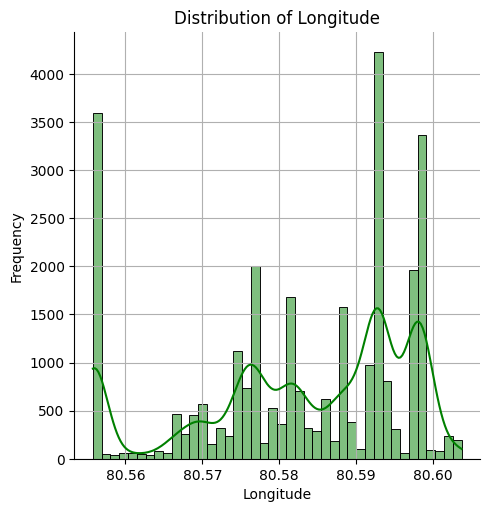

In [15]:
sns.displot(gps_data['Longitude'], kde=True, color='green')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Distribution of Longitude')
plt.grid(True)
plt.show()

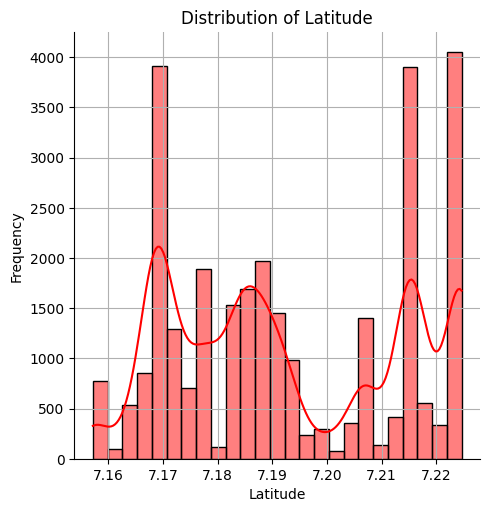

In [16]:
sns.displot(gps_data['Latitude'], kde=True, color='r')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Latitude')
plt.grid(True)
plt.show()

In [17]:
gps_data['DeviceHour'] = gps_data['DeviceTime'].dt.hour

C:\Users\PC\AppData\Local\Temp\ipykernel_1552\4548091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_data['DeviceHour'] = gps_data['DeviceTime'].dt.hour


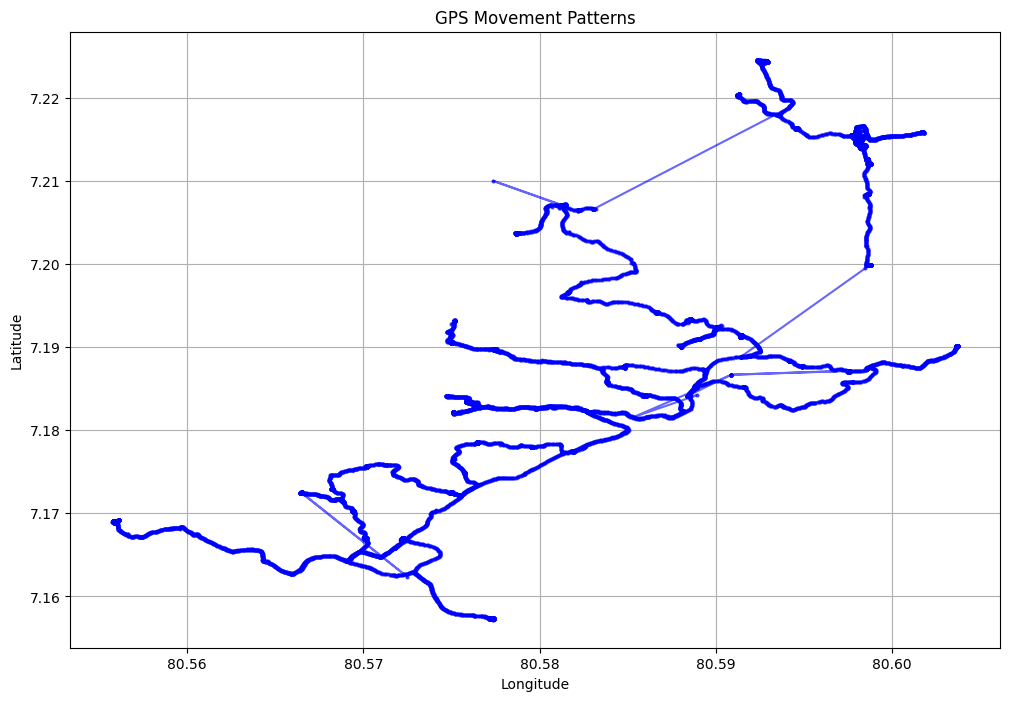

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(gps_data['Longitude'], gps_data['Latitude'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Movement Patterns')
plt.grid(True)
plt.show()

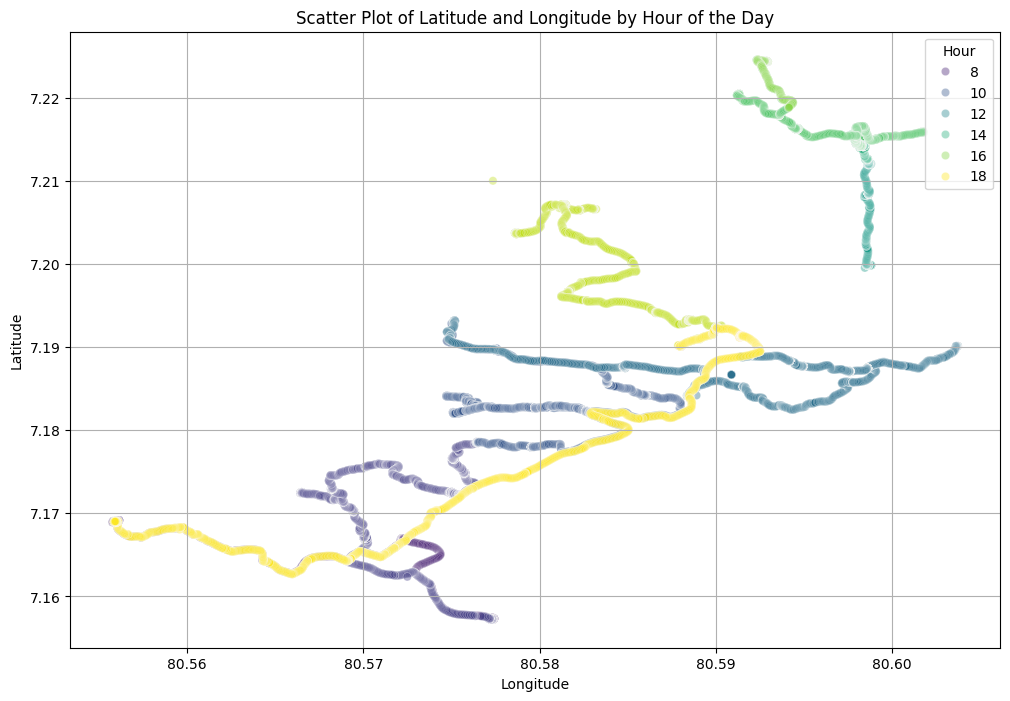

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=gps_data, x='Longitude', y='Latitude', hue='DeviceHour', 
                palette='viridis',marker='o', alpha=0.4)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude by Hour of the Day')
plt.legend(title='Hour')
plt.grid(True)
plt.show()

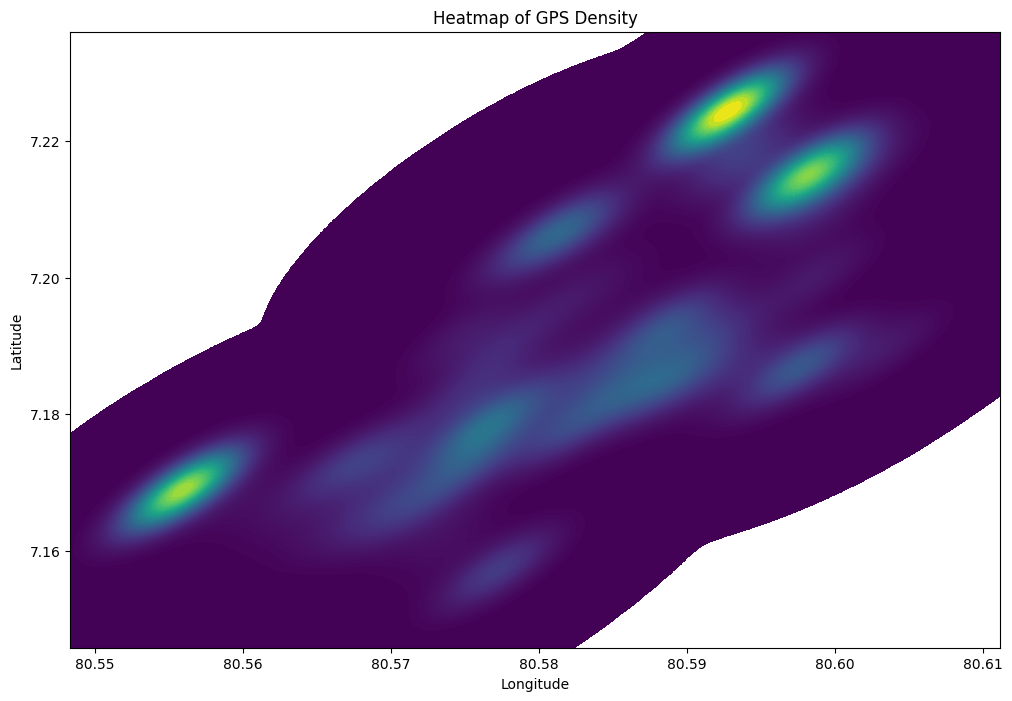

In [20]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=gps_data, x='Longitude', y='Latitude', cmap='viridis', fill=True, thresh=0, levels=100)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of GPS Density')
plt.show()

In [25]:
visit_counts = gps_data.groupby(['Longitude', 'Latitude']).size().reset_index(name='VisitCount')
visit_counts.shape

(12019, 3)

In [26]:
# Calculate the time difference between consecutive GPS points
gps_data['TimeDiff'] = gps_data['DeviceTime'].diff().dt.total_seconds()

# Replace negative time differences with 0 to avoid incorrect cumulative time calculations
gps_data['TimeDiff'] = gps_data['TimeDiff'].apply(lambda x: max(x, 0))

# Group the data by Longitude and Latitude and sum the time differences
total_time_spent = gps_data.groupby(['Longitude', 'Latitude'])['TimeDiff'].sum().reset_index()
total_time_spent.rename(columns={'TimeDiff': 'TotalTimeSpent'}, inplace=True)
total_time_spent.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_1552\938674014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_data['TimeDiff'] = gps_data['DeviceTime'].diff().dt.total_seconds()
C:\Users\PC\AppData\Local\Temp\ipykernel_1552\938674014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_data['TimeDiff'] = gps_data['TimeDiff'].apply(lambda x: max(x, 0))


,Longitude,Latitude,TotalTimeSpent
0,80.55576,7.16893,1.0
1,80.55576,7.16894,1.0
2,80.55577,7.16894,2.0
3,80.55578,7.16892,2.0
4,80.55578,7.16893,1.0


In [27]:
visit_counts = pd.merge(visit_counts, total_time_spent, on=['Longitude', 'Latitude'])
visit_counts.head()

,Longitude,Latitude,VisitCount,TotalTimeSpent
0,80.55576,7.16893,1,1.0
1,80.55576,7.16894,1,1.0
2,80.55577,7.16894,2,2.0
3,80.55578,7.16892,2,2.0
4,80.55578,7.16893,1,1.0


In [34]:
visit_counts[visit_counts['TotalTimeSpent']==visit_counts.TotalTimeSpent.max()]

,Longitude,Latitude,VisitCount,TotalTimeSpent
11531,80.59876,7.19995,9,6560.0


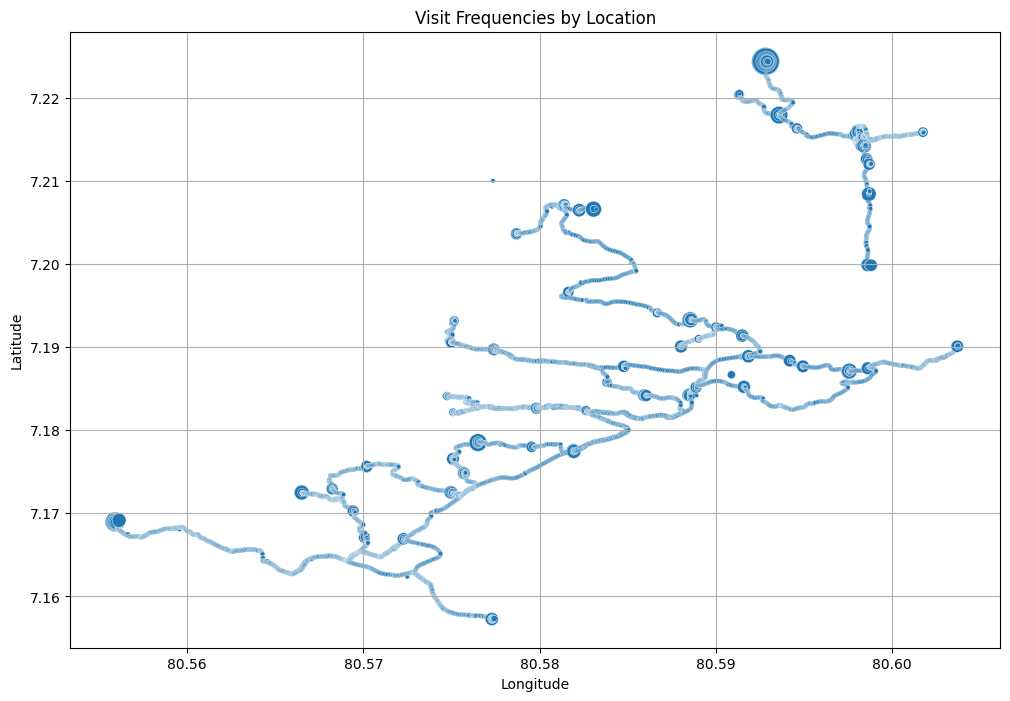

In [230]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=visit_counts, x='Longitude', y='Latitude', size='VisitCount', legend=False, sizes=(10, 400))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Visit Frequencies by Location')
plt.grid(True)
plt.show()

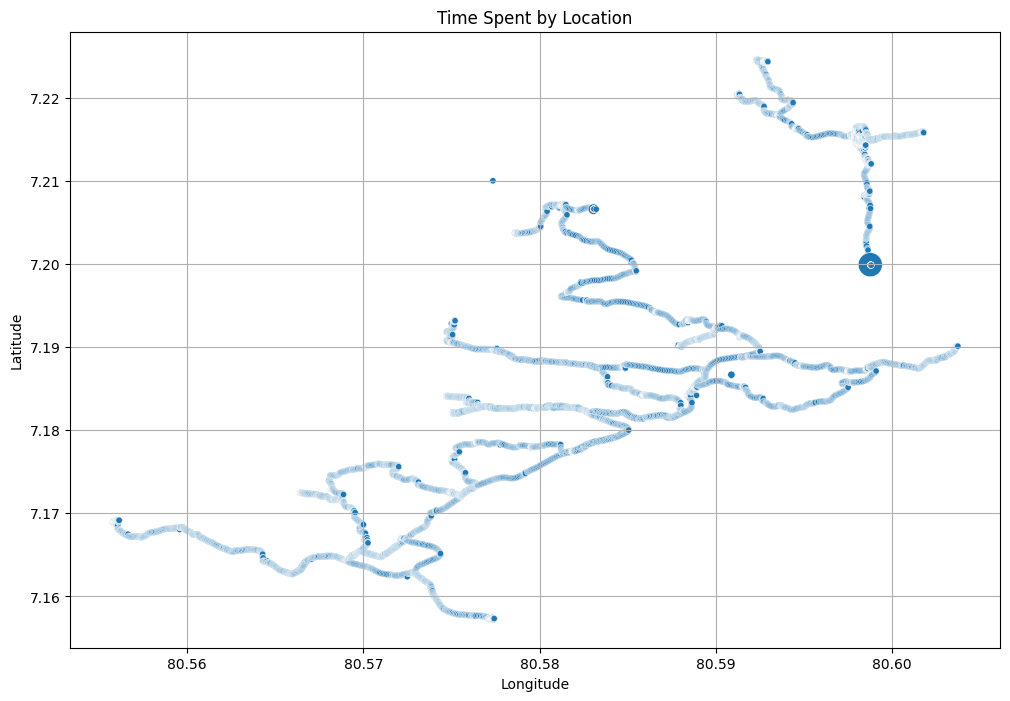

In [231]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=visit_counts, x='Longitude', y='Latitude', size='TotalTimeSpent', legend=False, sizes=(20,300))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Time Spent by Location')
plt.grid(True)
plt.show()

In [232]:
visit_counts['VisitCount'].sort_values(ascending=False)

8379    153
8380    149
8409    138
8361    116
8362    102
       ... 
4533      1
4534      1
4535      1
4536      1
6009      1
Name: VisitCount, Length: 12019, dtype: int64

In [ ]:
for i in range(len(visit_counts)[0]):
    specific_longitude = visit_counts.iloc[i]['Longitude']
    specific_latitude = visit_counts.iloc[i]['Latitude']

In [22]:
len(visit_counts)

12019

In [35]:
# Define the specific GPS point from visit_counts
specific_longitude = visit_counts.iloc[11531]['Longitude']
specific_latitude = visit_counts.iloc[11531]['Latitude']

# Filter the gps_data DataFrame for the specific GPS point
filtered_data = gps_data[(gps_data['Longitude'] == specific_longitude) & (gps_data['Latitude'] == specific_latitude)]

# Display the filtered rows

filtered_data

,Longitude,Latitude,DeviceTime,DeviceHour,TimeDiff
15026,80.59876,7.19995,2023-09-26 13:44:21,13,6413.0
15027,80.59876,7.19995,2023-09-26 13:44:28,13,7.0
15028,80.59876,7.19995,2023-09-26 13:44:48,13,20.0
15029,80.59876,7.19995,2023-09-26 13:45:08,13,20.0
15030,80.59876,7.19995,2023-09-26 13:45:28,13,20.0
15031,80.59876,7.19995,2023-09-26 13:45:48,13,20.0
15032,80.59876,7.19995,2023-09-26 13:46:08,13,20.0
15033,80.59876,7.19995,2023-09-26 13:46:29,13,21.0
15034,80.59876,7.19995,2023-09-26 13:46:48,13,19.0


In [31]:
(filtered_data['DeviceTime'].max()-filtered_data['DeviceTime'].min()).total_seconds()

1.0

In [30]:
visit_counts.iloc[2]['TotalTimeSpent']

np.float64(2.0)

In [236]:
filtered_data['TimeDiff'].max()

np.float64(2.0)